In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('concrete.csv')
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


<Axes: title={'center': 'Histogram of strength'}, xlabel='csMPa', ylabel='Count'>

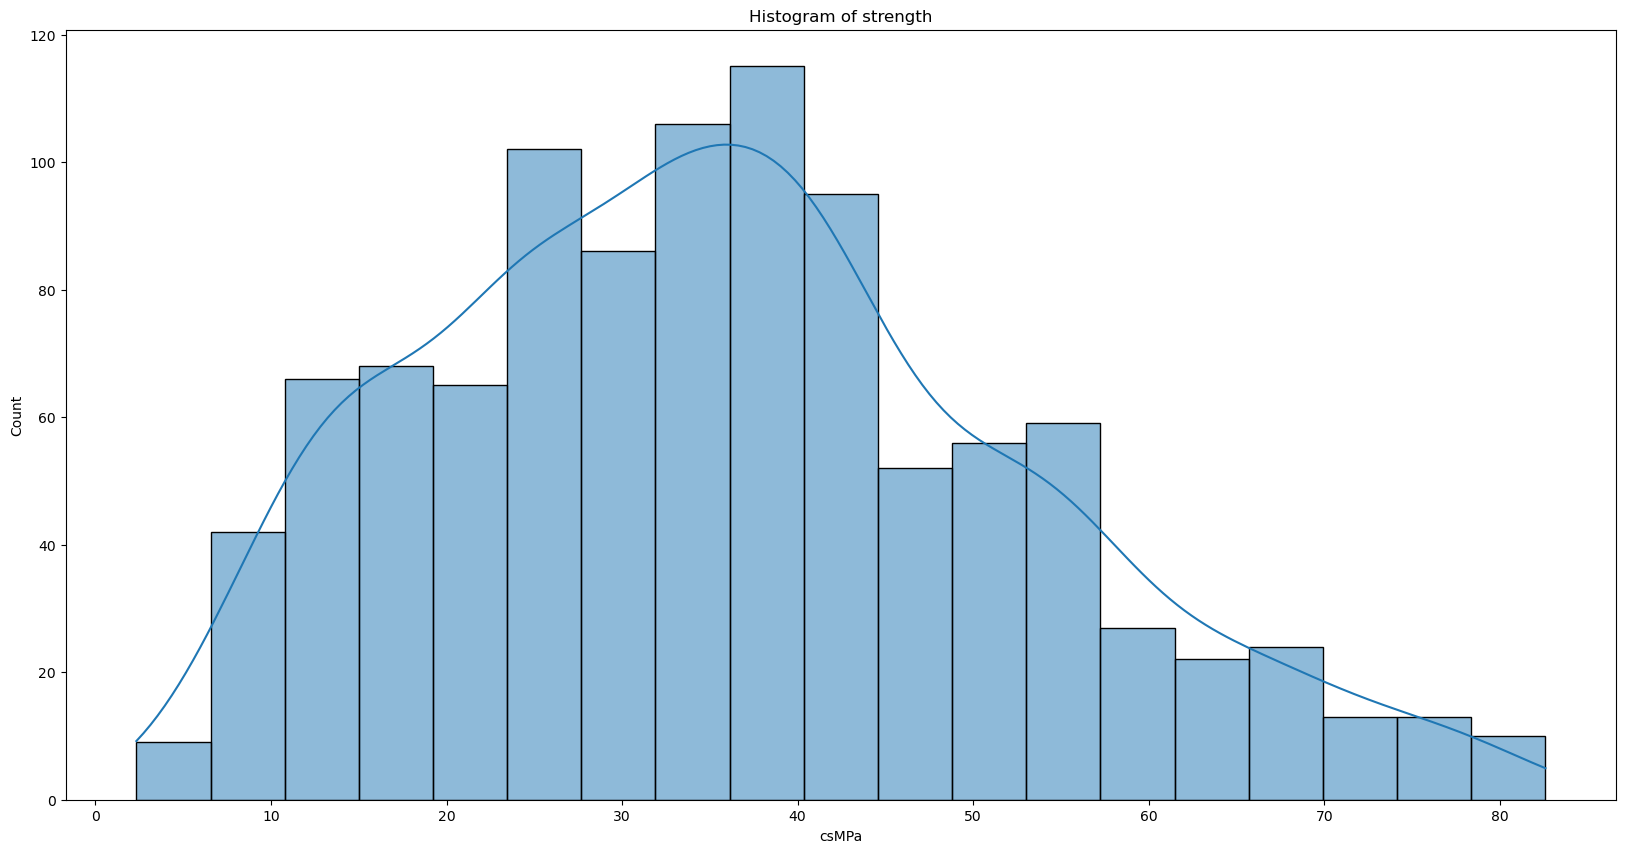

In [5]:
plt.figure(figsize=(20,10))
plt.title('Histogram of strength')
sns.histplot(data=df,x='csMPa', kde=True)

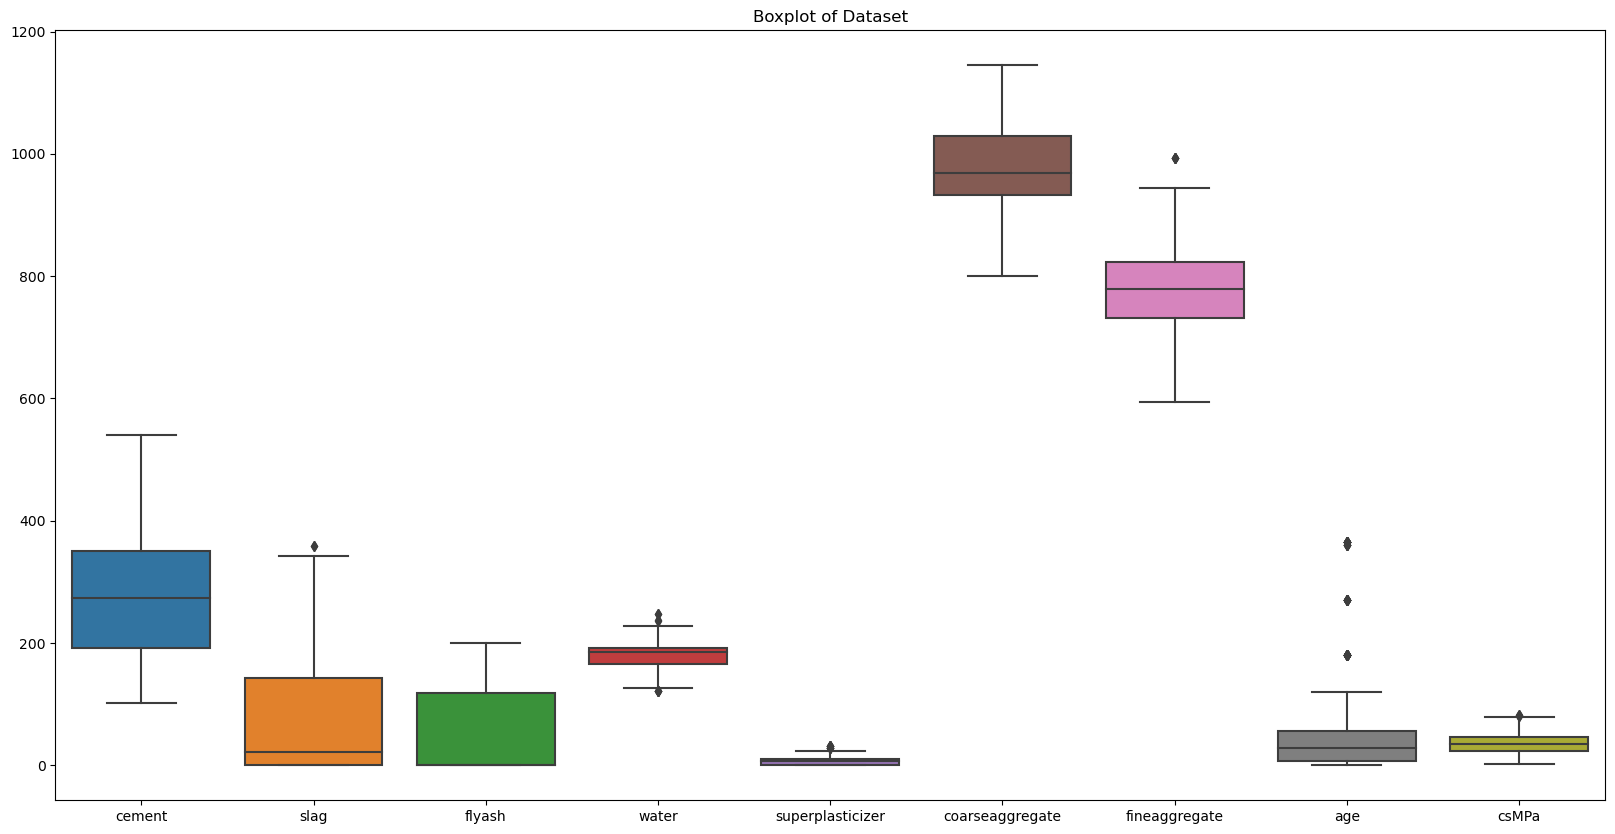

In [6]:
plt.figure(figsize=(20,10))
plt.title('Boxplot of Dataset')
sns.boxplot(data=df);

<Axes: title={'center': 'Boxplot of slag'}, xlabel='slag'>

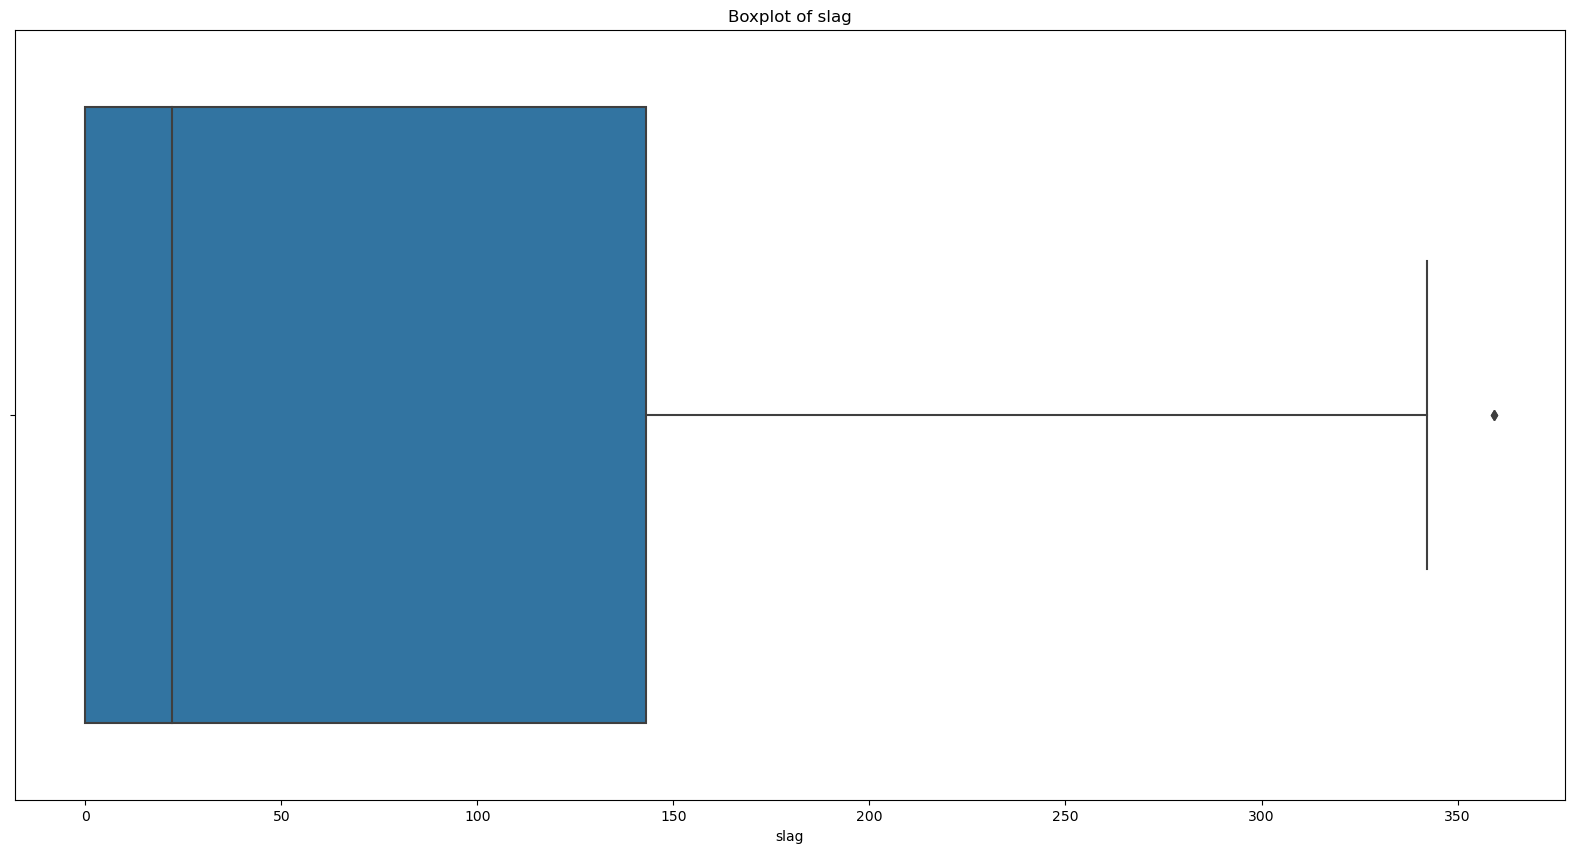

In [8]:
plt.figure(figsize=(20,10))
plt.title('Boxplot of slag')
sns.boxplot(data=df, x='slag')

In [9]:
df[df['slag'] > 350]

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
553,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42
559,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44


In [10]:
df = df.drop(df[df['slag'] > 350].index)

<Axes: title={'center': 'Boxplot of water'}, xlabel='water'>

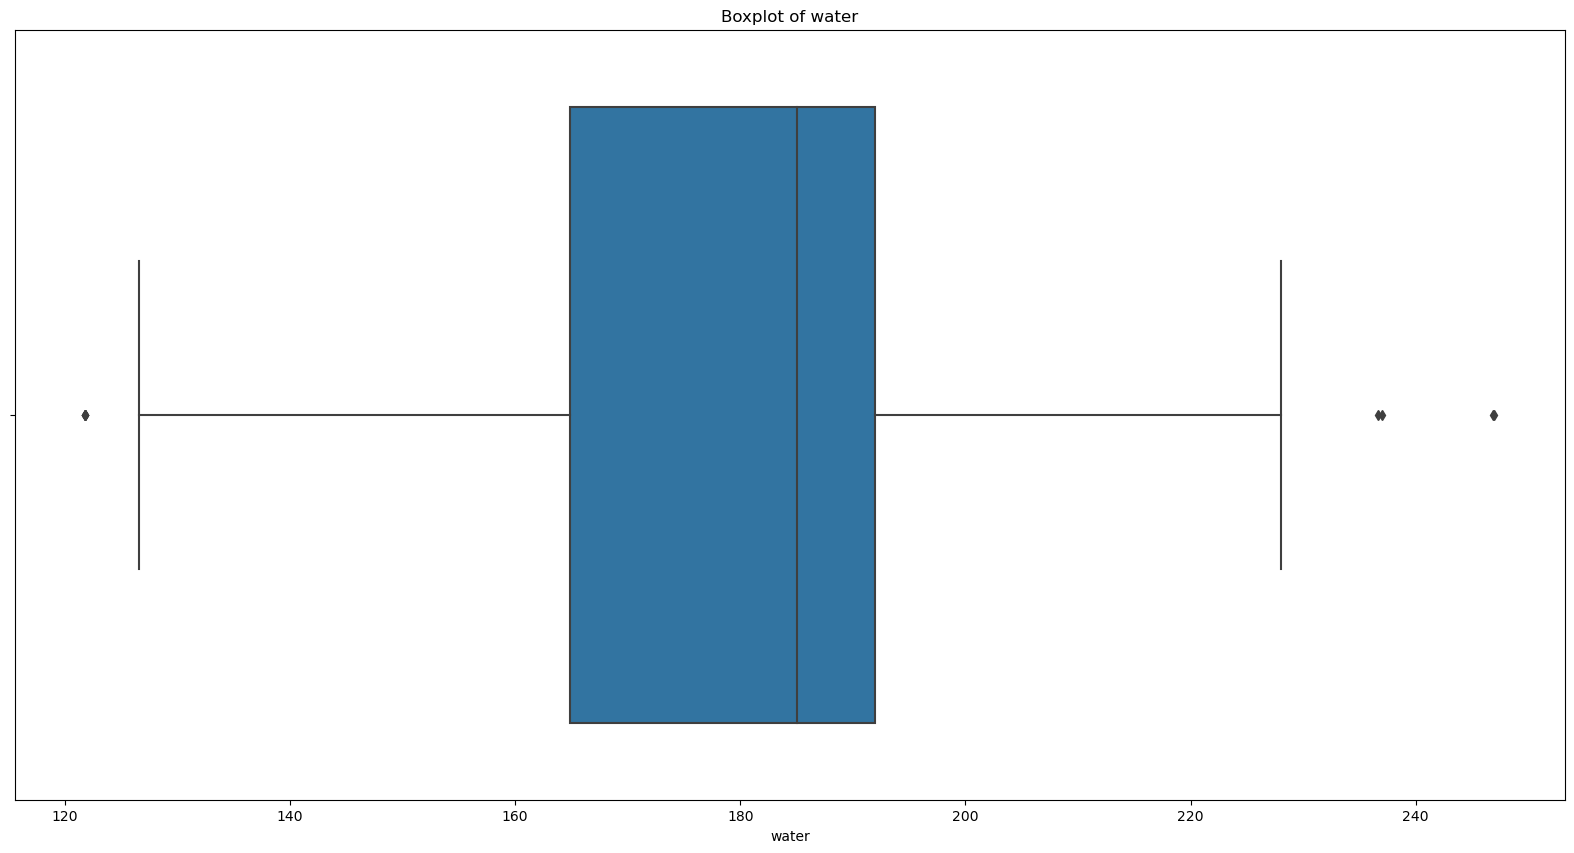

In [11]:
plt.figure(figsize=(20,10))
plt.title('Boxplot of water')
sns.boxplot(data=df, x='water')

In [12]:
df[(df['water'] < 122) | (df['water'] > 230)] 

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
224,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
225,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82
226,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
227,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
228,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
862,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
873,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
936,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
1019,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23


In [13]:
df['water'].describe()

count    1028.000000
mean      181.559241
std        21.374222
min       121.800000
25%       164.900000
50%       185.000000
75%       192.000000
max       247.000000
Name: water, dtype: float64

In [14]:
df = df.drop(df[(df['water'] < 122) | (df['water'] > 230)].index)

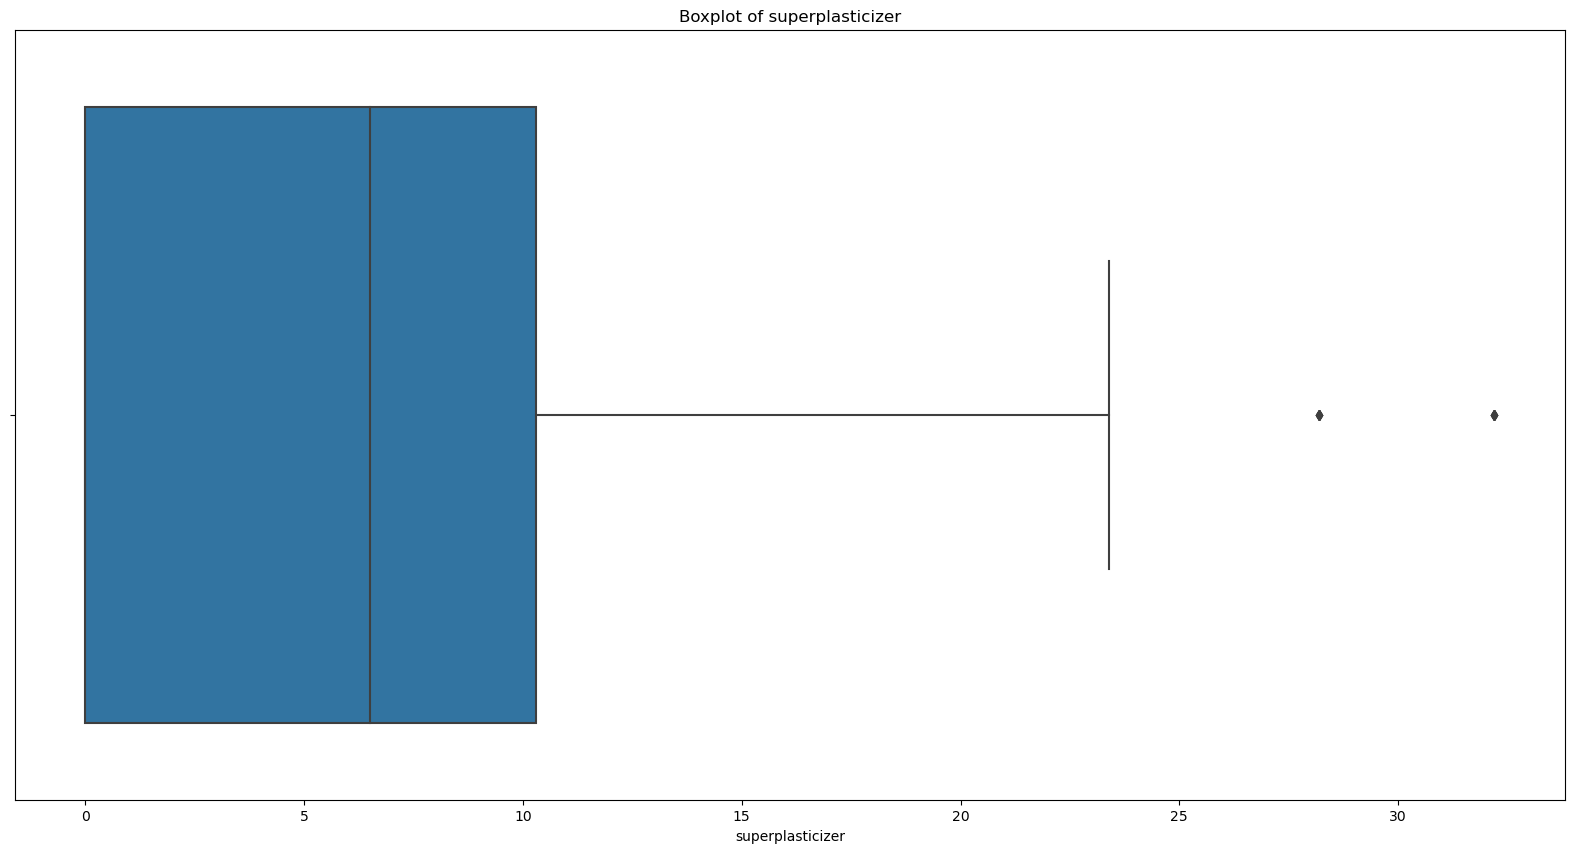

In [15]:
plt.figure(figsize=(20,10))
plt.title('Boxplot of superplasticizer')
sns.boxplot(data=df, x='superplasticizer')

In [16]:
df['superplasticizer'].describe()

count    1019.000000
mean        6.220314
std         5.999582
min         0.000000
25%         0.000000
50%         6.500000
75%        10.300000
max        32.200000
Name: superplasticizer, dtype: float64

In [17]:
df = df.drop(df[df['superplasticizer'] > 25].index)

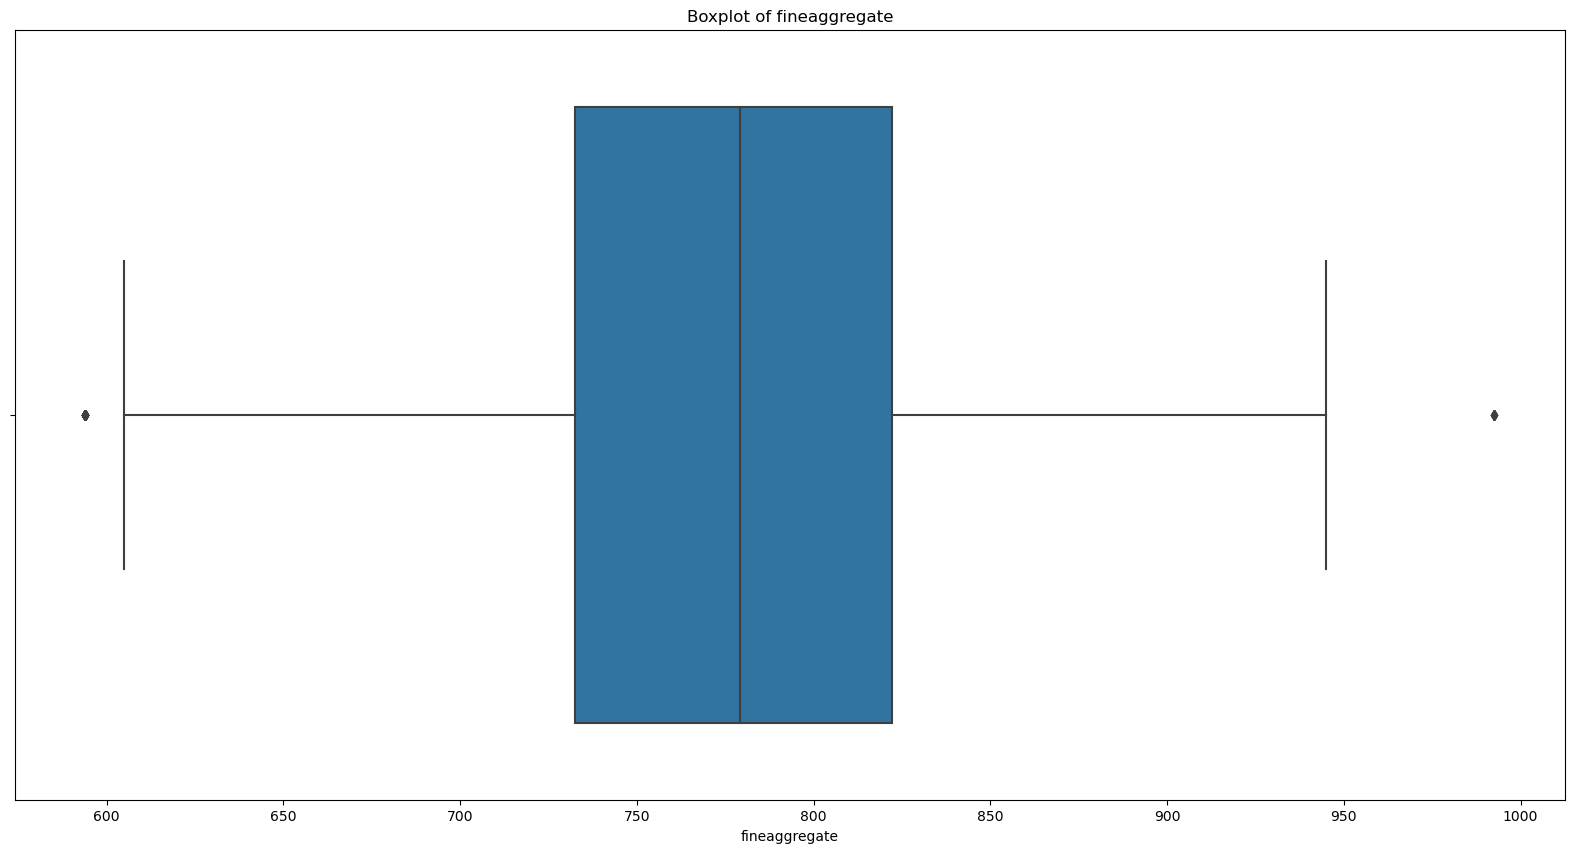

In [18]:
plt.figure(figsize=(20,10))
plt.title('Boxplot of fineaggregate')
sns.boxplot(data=df, x='fineaggregate')

In [19]:
df[(df['fineaggregate'] < 600) | (df['fineaggregate'] > 950)]

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29
12,427.5,47.5,0.0,228.0,0.0,932.0,594.0,270,43.01
18,380.0,95.0,0.0,228.0,0.0,932.0,594.0,90,40.56
19,475.0,0.0,0.0,228.0,0.0,932.0,594.0,180,42.62
20,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
26,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270,41.15


In [20]:
df = df.drop(df[(df['fineaggregate'] < 600) | (df['fineaggregate'] > 950)].index)

In [21]:
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


<Axes: title={'center': 'Boxplot of age'}, xlabel='age'>

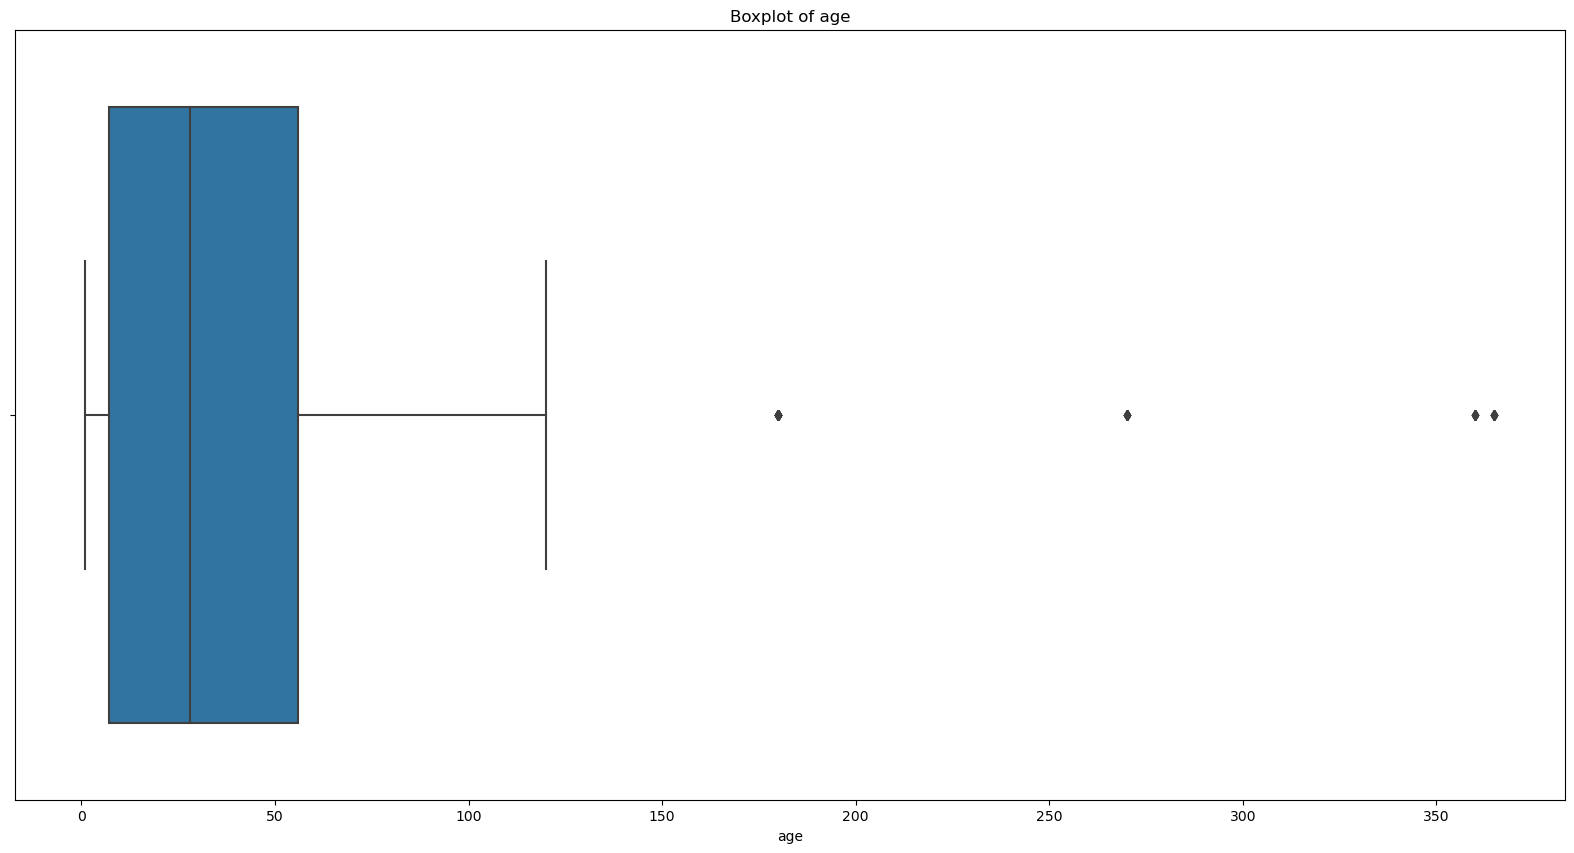

In [22]:
plt.figure(figsize=(20,10))
plt.title('Boxplot of age')
sns.boxplot(data=df, x='age')

In [23]:
df[df['age'] > 150]

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
17,342.0,38.0,0.0,228.0,0.0,932.0,670.0,365,56.14
23,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,180,44.21
24,380.0,0.0,0.0,228.0,0.0,932.0,670.0,365,52.52
25,380.0,0.0,0.0,228.0,0.0,932.0,670.0,270,53.30
27,342.0,38.0,0.0,228.0,0.0,932.0,670.0,180,52.12
30,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,55.26
31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365,52.91
32,198.6,132.4,0.0,192.0,0.0,978.4,825.5,180,41.72
34,190.0,190.0,0.0,228.0,0.0,932.0,670.0,365,53.69


In [24]:
df = df.drop(df[df['age'] > 150].index)

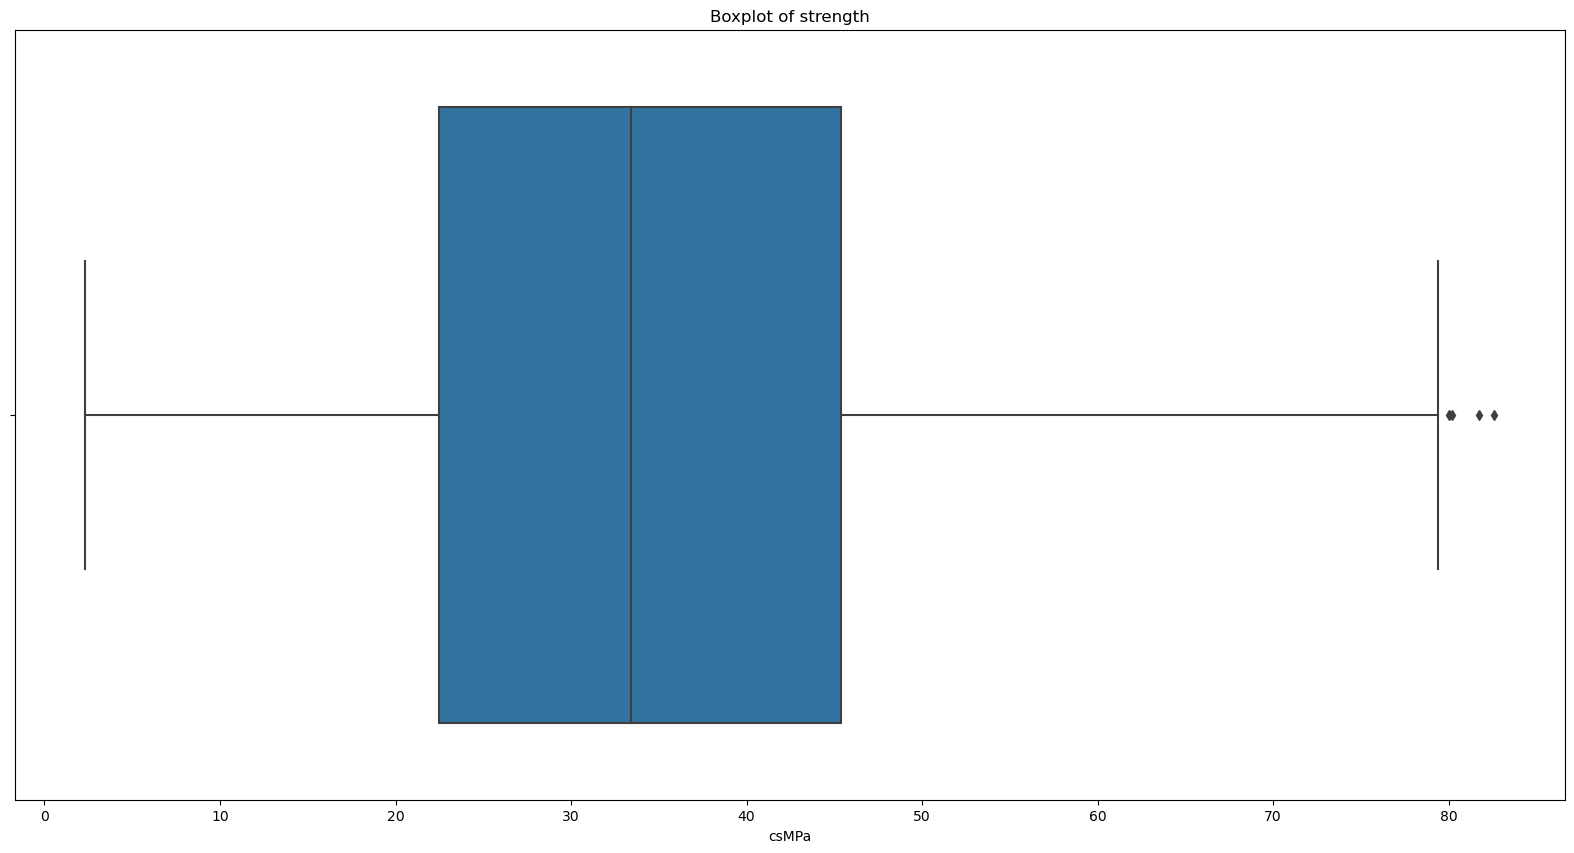

In [25]:
plt.figure(figsize=(20,10))
plt.title('Boxplot of strength')
sns.boxplot(data=df, x='csMPa');

In [26]:
df['csMPa'].describe()

count    930.000000
mean      35.074548
std       16.953394
min        2.330000
25%       22.492500
50%       33.400000
75%       45.352500
max       82.600000
Name: csMPa, dtype: float64

In [27]:
df[df['csMPa'] > 79]

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
153,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.20
159,389.9,189.0,0.0,145.9,22.0,944.7,755.8,56,79.40
175,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
177,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
179,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
181,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.60
182,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
381,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.75


In [28]:
df = df.drop(df[df['csMPa'] > 79].index)

In [29]:
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
10,198.6,132.4,0.0,192.0,0.0,978.4,825.5,90,38.07
11,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,28.02
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


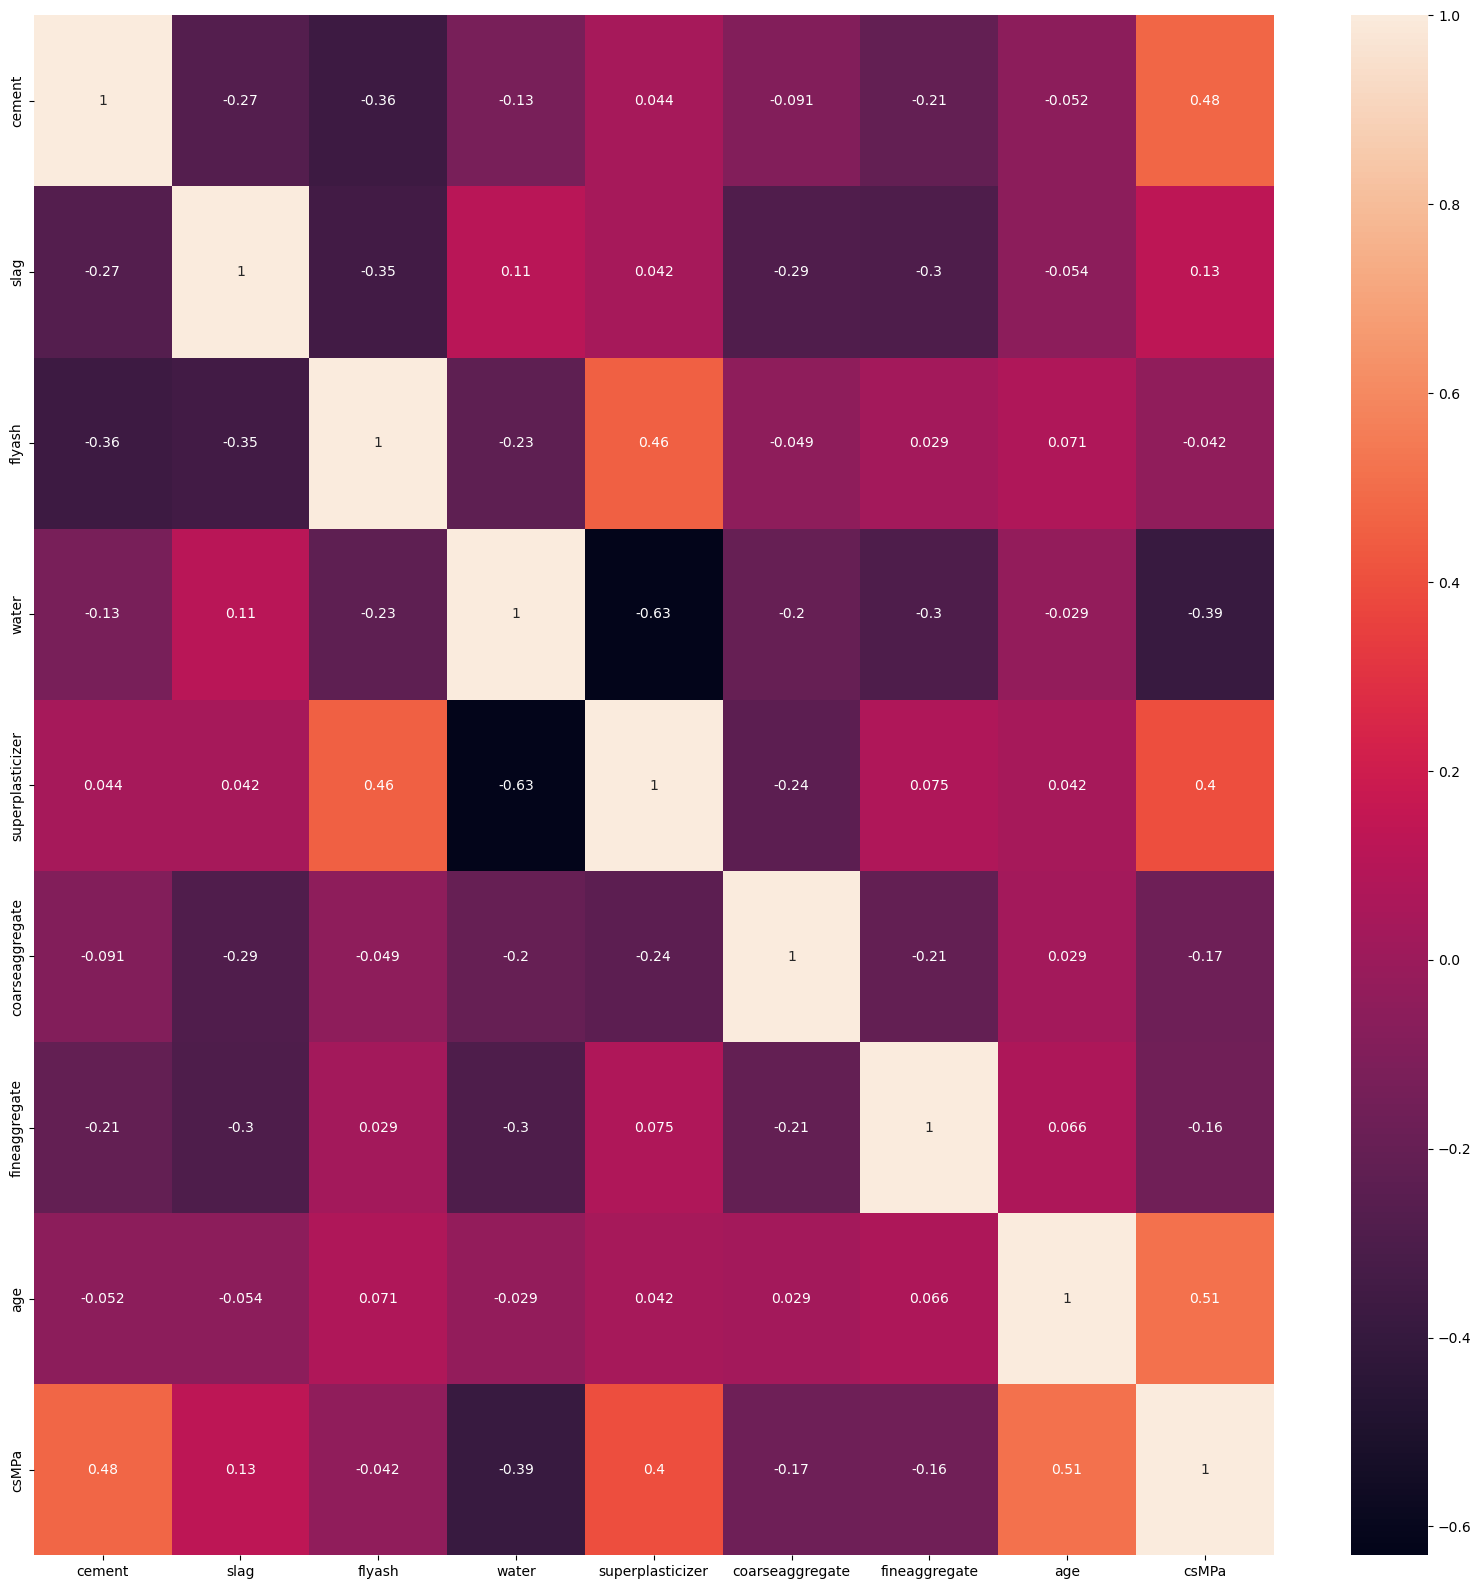

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df.corr(), annot=True);

In [31]:
df.corr()['csMPa'].sort_values()[:-1]

water              -0.385794
coarseaggregate    -0.165909
fineaggregate      -0.161633
flyash             -0.042227
slag                0.129455
superplasticizer    0.398849
cement              0.476464
age                 0.509746
Name: csMPa, dtype: float64

In [32]:
X = df.drop('csMPa', axis=1)
y = df['csMPa']

In [33]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
from sklearn.svm import SVR, LinearSVR

In [35]:
svm_regressor = SVR()
svm_regressor.fit(X_train, y_train)
y_preds = svm_regressor.predict(X_test)

In [36]:
score = svm_regressor.score(X_test, y_test)
score

0.7115838810184291

In [38]:
mse = mean_squared_error(y_test, y_preds)
r2 = r2_score(y_test, y_preds)

print(f"Root Mean Squared Error (RMSE): {mse}")
print(f"R^2 Score: {r2}")

Root Mean Squared Error (RMSE): 86.52332712943141
R^2 Score: 0.7115838810184291


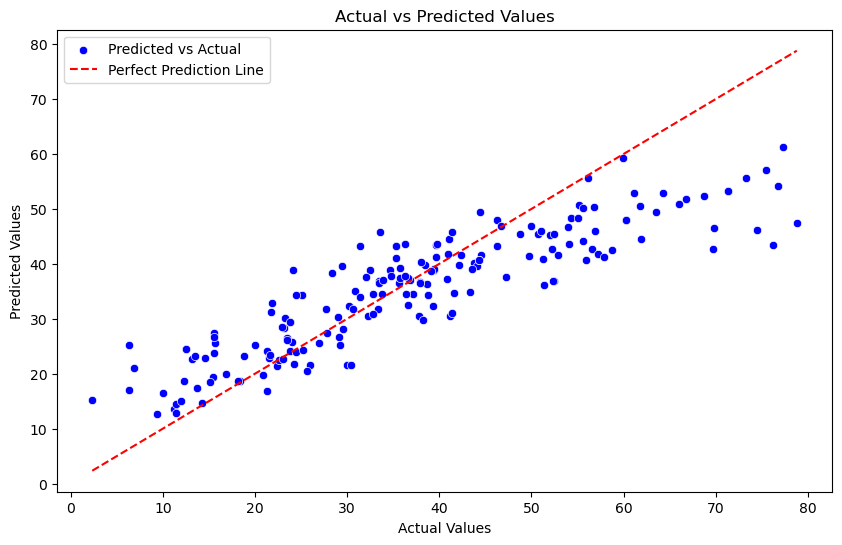

In [39]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_test, y=y_preds, color='blue', label="Predicted vs Actual")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction Line")

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()